In [215]:
import random as rand
import numpy as np
from matplotlib import pyplot as plt
from itertools import product


<h3>Perceptron from scratch</h3>

In [108]:
class Perceptron:
    
    def __init__(self, weights=[1,1,1], input_numbers=3):
        self.input_numbers = input_numbers
        self.weights = weights
        
    def weighted_sum(self, inputs):
        # weighted sum noted as z
        z = 0
        for i in range(self.input_numbers):
            z += self.weights[i] * inputs[i]
        return z
    
    def step_function(self, weighted_sum):
        # Heavyside step function
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1

    def training(self, training_data):
        decision_boundary = False
        while not decision_boundary:
            error_sum = 0
            for inputs in training_data:
                predicted_value = self.step_function(self.weighted_sum(inputs))
                true_value = training_data[inputs]
                error = true_value - predicted_value
                error_sum += abs(error)
                for i in range(self.input_numbers):
                    self.weights[i] += error * inputs[i]
            if error_sum == 0:
                decision_boundary = True
        return self.weights
                


In [109]:
p1 = Perceptron()
#print(p1.weighted_sum([24, 55]))
print(p1.step_function(52))

1


In [110]:
def generate_data(points):
    x_coordinates = [rand.randint(0, 70) for i in range(points)]
    y_coordinates = [rand.randint(0, 70) for i in range(points)]
    data = dict()
    for x, y in zip(x_coordinates, y_coordinates):
        if x + y <= 70:
            # The third parameter represents the bias.
            data[(x, y, 1)] = -1
        elif x + y > 70:
            data[(x, y, 1)] = 1
    return data 
        

In [111]:
training_data = generate_data(40)

In [112]:
p2 = Perceptron()
weights = p2.training(training_data)


In [113]:
def plot_decision_boundary(slope, intercept):
    # get/create the current axes
    axes = plt.gca()
    # get the x-axis view limits
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

slope = -weights[0] / weights[1]
intercept = -weights[2] / weights[1] 

# Another way to draw the linear decision boundary line
# point1 = (0, -weights[2] / weights[1])
# point2 = (-weights[2]/weights[0], 0)
# plt.plot([point1[0], point2[0]], [point1[1], point2[1]])

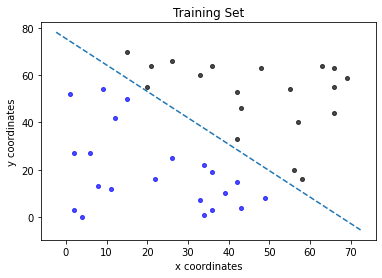

In [114]:
x_black = []
x_blue = []
y_black = []
y_blue = []

for point in training_data:
    if training_data[point] == 1:
        x_black.append(point[0])
        y_black.append(point[1])
    elif training_data[point] == -1:
        x_blue.append(point[0])
        y_blue.append(point[1])
        
plt.scatter(x_black, y_black, marker = '.', c = 'black', s=64, alpha=0.7)
plt.scatter(x_blue, y_blue, marker = '.', c = 'blue', s=64, alpha=0.7)
plt.title("Training Set")
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')

plot_decision_boundary(slope, intercept)
plt.show()



<h3>Scikit-Learn Implementation of Perceptron on Iris Dataset</h3>

In [115]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [116]:
iris = load_iris()

In [141]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [119]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [132]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

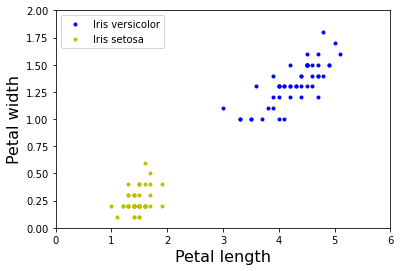

In [143]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.", label="Iris setosa")
plt.xlabel("Petal length", fontsize=16)
plt.ylabel("Petal width", fontsize=16)
plt.axis([0, 6, 0, 2])
plt.legend()

In [133]:
classifier = Perceptron()
classifier.fit(X, y)
print(classifier.score(X, y))

1.0


In [146]:
print(classifier.predict([[1.5, 0.5]]))
print(classifier.predict([[5, 1.75]]))

[0]
[1]


<h3>Logic Gates(AND Gate)</h3>

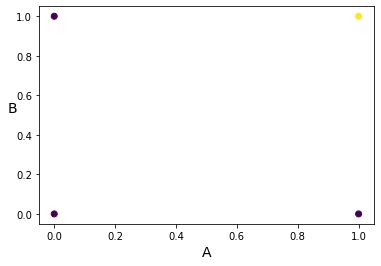

In [166]:
inputs = [[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]

outputs = [0, 0, 0, 1]

plt.scatter([point[0] for point in inputs], [point[1] for point in inputs], c=outputs)
plt.xlabel('A', fontsize=14)
plt.ylabel('B', fontsize=14, rotation=0)
plt.show()

In [168]:
clf = Perceptron()
clf.fit(inputs, outputs)
print(clf.score(inputs, outputs))

1.0


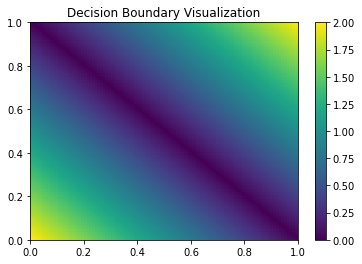

In [176]:
x_coordinates = np.linspace(0, 1, 100)

y_coordinates = np.linspace(0, 1, 100)

grids = list(product(x_coordinates, y_coordinates))

distances = clf.decision_function(grids)
distances_matrix = np.reshape([abs(point) for point in distances], (100, 100))

heatmap = plt.pcolormesh(x_coordinates, y_coordinates, distances_matrix)
plt.colorbar(heatmap)
plt.title('Decision Boundary Visualization')
plt.show()

<h3>OR gate</h3>

Text(0, 0.5, 'B')

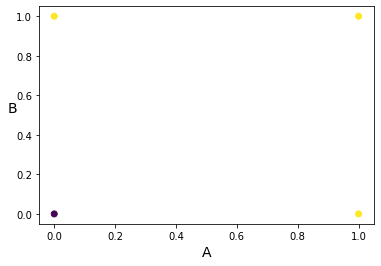

In [178]:
inputs = [[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]

outputs = [0, 1, 1, 1]

plt.scatter([point[0] for point in inputs], [point[1] for point in inputs], c=outputs)
plt.xlabel('A', fontsize=14)
plt.ylabel('B', fontsize=14, rotation=0)


1.0


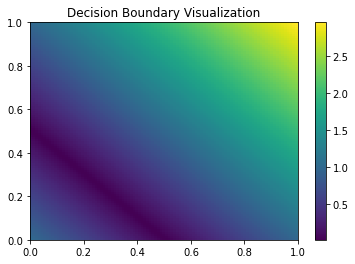

In [179]:
clf = Perceptron()
clf.fit(inputs, outputs)
print(clf.score(inputs, outputs))

x_coordinates = np.linspace(0, 1, 100)

y_coordinates = np.linspace(0, 1, 100)

grids = list(product(x_coordinates, y_coordinates))

distances = clf.decision_function(grids)
distances_matrix = np.reshape([abs(point) for point in distances], (100, 100))

heatmap = plt.pcolormesh(x_coordinates, y_coordinates, distances_matrix)
plt.colorbar(heatmap)
plt.title('Decision Boundary Visualization')
plt.show()

<h3>XOR Gate</h3>

Text(0, 0.5, 'B')

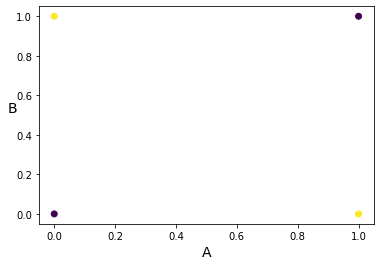

In [180]:
inputs = [[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]

outputs = [0, 1, 1, 0]

0.5


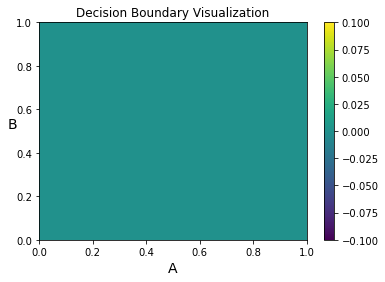

In [182]:
plt.scatter([point[0] for point in inputs], [point[1] for point in inputs], c=outputs)
plt.xlabel('A', fontsize=14)
plt.ylabel('B', fontsize=14, rotation=0)

clf = Perceptron()
clf.fit(inputs, outputs)
print(clf.score(inputs, outputs))

x_coordinates = np.linspace(0, 1, 100)

y_coordinates = np.linspace(0, 1, 100)

grids = list(product(x_coordinates, y_coordinates))

distances = clf.decision_function(grids)
distances_matrix = np.reshape([abs(point) for point in distances], (100, 100))

heatmap = plt.pcolormesh(x_coordinates, y_coordinates, distances_matrix)
plt.colorbar(heatmap)
plt.title('Decision Boundary Visualization')
plt.show()

<h3>Submission part</h3>


In [216]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

In [204]:
df = pd.read_csv('sonar.all-data.csv', header=None)
df.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   R  
3  0.0040  0.0117   R  
4  0.0107  0.0094   R  

[5 rows x 61 columns]

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [189]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [197]:
df[60]

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [205]:
df[60] = df[60].map({'M':1, 'R':0})

In [206]:
df.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   0  
1  0.0052  0.0044   0  
2  0.0095  0.0078   0  
3  0.0040  0.0117   0  
4  0.0107  0.0094   0  

[5 rows x 61 columns]

In [207]:
X = df.iloc[:, :60]
y = df.iloc[:, 60]

In [209]:
X.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      50      51      52      53      54      55      56  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052  0.0044  
2  0.0164  0.0095  0.0078  
3  0.0044  0.0040  0.0117  
4  0.0048  0.0107  0.0094  

[5 rows x 60 columns]

In [211]:
y.value_counts()

1    111
0     97
Name: 60, dtype: int64

In [213]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [212]:
# clf = Perceptron()
# clf.fit(X, y)
# print(clf.score(X, y))


0.7644230769230769


In [217]:
clf = Perceptron()
clf.fit(X_scaled, y)
print(clf_2.score(X_scaled, y))

0.8701923076923077
